In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

## **Data Set**

In [ ]:
from sklearn.datasets import load_breast_cancer

In [ ]:
cancer= load_breast_cancer()

In [ ]:
cancer

{'DESCR': '.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry \n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        largest values) of these features were computed for each image,\n        resulting in 30 features.  For

In [ ]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [ ]:
print(cancer['DESCR'])

In [ ]:
print(cancer['target'])

In [ ]:
print(cancer['target_names'])

['malignant' 'benign']


In [ ]:
print(cancer['feature_names'])

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [ ]:
cancer['data'].shape

(569, 30)

In [ ]:
df= pd.DataFrame(cancer['data'], columns= cancer['feature_names'])

In [ ]:
df['target']= cancer['target']

In [ ]:
df.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.256,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.463,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.075,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.595,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,0.3857,1.428,2.548,19.15,0.007189,0.00466,0.00000,0.00000,0.02676,0.002783,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [ ]:
df.shape

(569, 31)

In [ ]:
df['target'].value_counts()

1    357
0    212
Name: target, dtype: int64

## **Visualize Data**

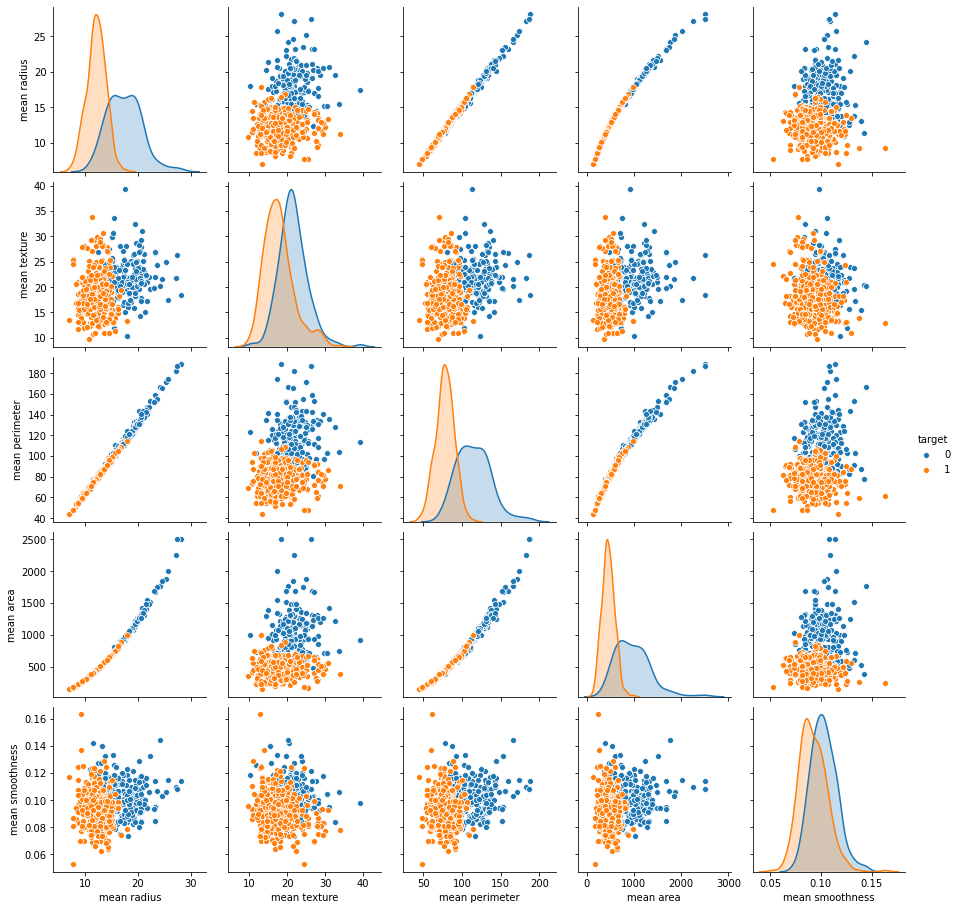

In [ ]:
#pairplot
sns.pairplot(df, hue= 'target', vars= ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness'])

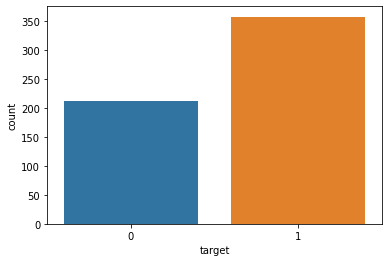

In [ ]:
sns.countplot(df['target'])

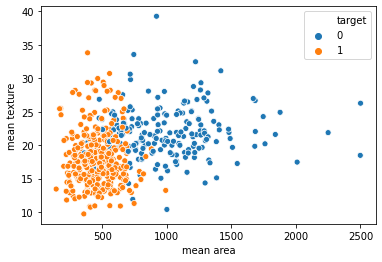

In [ ]:
sns.scatterplot(x= 'mean area', y= 'mean texture', hue= 'target', data= df)

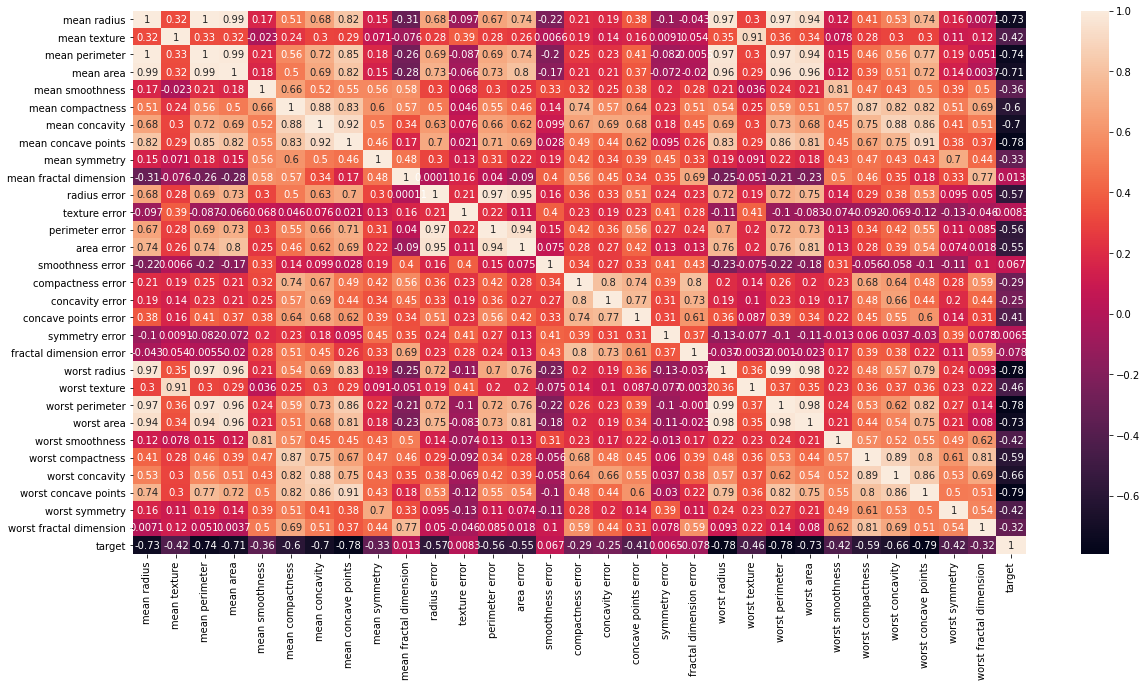

In [ ]:
#Correlation plot
plt.figure(figsize= (20, 10))
sns.heatmap(df.corr(), annot= True)

#**Model Training**

In [ ]:
X= df.drop('target', axis= 1)

In [ ]:
X.shape

(569, 30)

In [ ]:
y= df['target']

In [ ]:
y

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int64

In [ ]:
y.value_counts(normalize= True)

1    0.627417
0    0.372583
Name: target, dtype: float64

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state= 1)

In [ ]:
from sklearn.svm import SVC

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
svc_model= SVC()

In [ ]:
svc_model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

# **Model Evaluation**

In [ ]:
y_pred= svc_model.predict(X_test)

In [ ]:
y_pred

array([1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1])

In [ ]:
cm= confusion_matrix(y_test, y_pred)

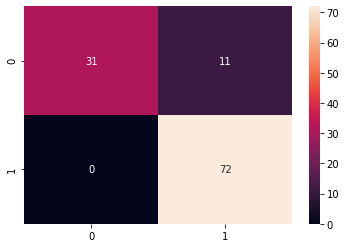

In [ ]:
sns.heatmap(cm, annot= True)

# **Improving The Model**

In [ ]:
#Step 1
## split the data set with stratify = y
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state= 1, stratify= y)


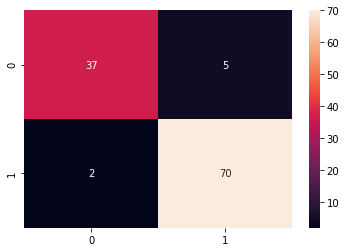

In [ ]:
svc_model= SVC()
svc_model.fit(X_train, y_train)
y_pred= svc_model.predict(X_test)
cm= confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot= True)

In [ ]:
# Step 2: Data Normalisation
# Step 3: Tune Hyperparameters
# C: trade off b/w 'classifying training points correctly' & 'having smooth decision boundary'
## small C: low penalty on misclassification, soft margin while explaining training points and underfit
## large C: high penalty on misclassification, forcing model to explain traininig points and overfit
# Gamma: Controls how far the influence of single training point reaches
## Large: closer points have higher weights
## Small: More Generalised

In [ ]:
#Normalisation
min_train= X_train.min()

In [ ]:
range_train= (X_train-min_train).max()

In [ ]:
X_train_scaled= (X_train-min_train)/range_train

In [ ]:
X_train_scaled.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
190,0.342610,0.440830,0.349527,0.197837,0.495351,0.673565,0.464587,0.345949,0.699827,0.533475,0.062205,0.532372,0.063846,0.046541,0.186312,1.000000,0.294444,0.315590,0.608544,0.372789,0.277837,0.666397,0.278849,0.141860,0.499675,0.876519,0.677955,0.608935,0.709836,0.587433
85,0.543282,0.281661,0.534241,0.395122,0.416268,0.247099,0.313086,0.459749,0.554917,0.211441,0.212173,0.339175,0.189653,0.137838,0.133647,0.096799,0.070859,0.268990,0.222576,0.097086,0.533618,0.409987,0.506948,0.348457,0.402209,0.163226,0.252157,0.564261,0.419870,0.201692
512,0.303800,0.350865,0.309930,0.175270,0.523337,0.377548,0.338884,0.427182,0.545716,0.487500,0.100123,0.173543,0.110069,0.050183,0.096511,0.143588,0.087172,0.252699,0.129003,0.105740,0.301672,0.463428,0.313213,0.162013,0.529276,0.337361,0.407827,0.704811,0.398186,0.366391
57,0.365801,0.387889,0.357681,0.217773,0.551323,0.344936,0.303236,0.424621,0.494537,0.367373,0.111723,0.240295,0.093201,0.062174,0.034852,0.188403,0.064949,0.240955,0.144763,0.109305,0.353611,0.491498,0.325166,0.196692,0.380550,0.380131,0.286502,0.630241,0.420461,0.356553
142,0.210564,0.239792,0.206413,0.107953,0.510698,0.214362,0.047631,0.097282,0.274871,0.325847,0.061589,0.470914,0.055600,0.027228,0.140428,0.103331,0.029242,0.180337,0.210193,0.089159,0.172536,0.385155,0.160616,0.078107,0.413039,0.133957,0.061565,0.220000,0.200867,0.170012


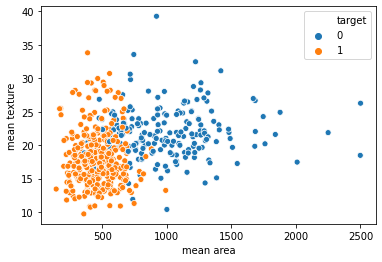

In [ ]:
sns.scatterplot(x= 'mean area', y= 'mean texture', hue= 'target', data= df)

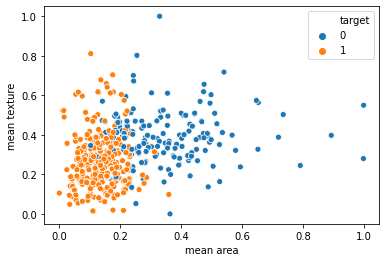

In [ ]:
sns.scatterplot(x= 'mean area', y= 'mean texture', hue= y_train, data= X_train_scaled)

In [ ]:
min_test= X_test.min()
range_test= (X_test-min_test).max()
X_test_scaled= (X_test-min_test)/range_test

In [ ]:
X_test_scaled.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
523,0.326647,0.394112,0.308982,0.227172,0.445918,0.300048,0.126172,0.188022,0.330303,0.492928,0.148551,0.195967,0.161800,0.085139,0.232502,0.194512,0.135896,0.387726,0.176441,0.129851,0.283544,0.407607,0.293516,0.173225,0.595757,0.362999,0.250421,0.503529,0.456259,0.529104
283,0.488277,0.398067,0.488003,0.379205,0.536440,0.550716,0.456420,0.449901,0.412121,0.450494,0.125796,0.122617,0.181054,0.092403,0.131841,0.312613,0.252248,0.346716,0.083608,0.145057,0.441938,0.391435,0.481990,0.296673,0.545644,0.701762,0.650446,0.679216,0.428165,0.782712
456,0.193765,0.860281,0.185354,0.125925,0.377905,0.227245,0.167760,0.100249,0.373232,0.312250,0.144544,0.456238,0.147466,0.070434,0.376926,0.210547,0.278502,0.264267,0.292964,0.056143,0.191915,0.802336,0.201647,0.107919,0.579888,0.278308,0.378284,0.268039,0.468706,0.241872
527,0.239123,0.112478,0.221657,0.160605,0.334834,0.149613,0.069306,0.131561,0.317677,0.216707,0.003649,0.029388,0.000000,0.007649,0.091039,0.066415,0.056886,0.164611,0.033724,0.021452,0.214476,0.217131,0.209743,0.121835,0.484674,0.285115,0.231785,0.419608,0.549075,0.300872
237,0.759152,0.516257,0.699402,0.704507,0.255992,0.219506,0.211856,0.299304,0.205556,0.048305,0.412093,0.149971,0.467728,0.337828,0.288939,0.279199,0.277329,0.479208,0.074556,0.138319,0.703011,0.423780,0.720755,0.566375,0.431220,0.322632,0.408697,0.566667,0.238976,0.227121


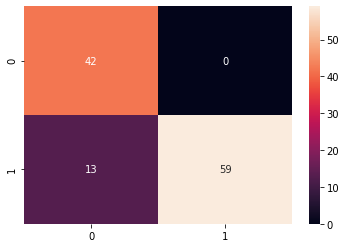

In [ ]:
svc_model= SVC()
svc_model.fit(X_train_scaled, y_train)
y_pred= svc_model.predict(X_test_scaled)
cm= confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot= True)

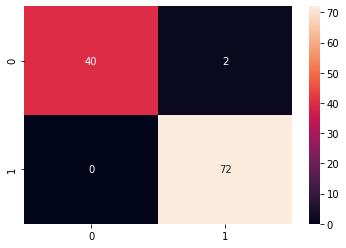

In [ ]:
#Standard Scaling
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train_standard_scaled= sc.fit_transform(X_train)
X_test_standard_scaled= sc.transform(X_test)

svc_model= SVC()
svc_model.fit(X_train_standard_scaled, y_train)
y_pred_std= svc_model.predict(X_test_standard_scaled)
cm= confusion_matrix(y_test, y_pred_std)
sns.heatmap(cm, annot= True)

In [ ]:
#for standard scaling
print(classification_report(y_test, y_pred_std))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        42
           1       0.97      1.00      0.99        72

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [ ]:
#for normalisation
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      1.00      0.87        42
           1       1.00      0.82      0.90        72

    accuracy                           0.89       114
   macro avg       0.88      0.91      0.88       114
weighted avg       0.91      0.89      0.89       114



In [ ]:
#Tuning C and Gamma Parameters
param_grid= {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid= GridSearchCV(SVC(), param_grid, refit=True, verbose= 4)

In [ ]:
grid.fit(X_train_standard_scaled, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.626, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.626, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.626, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.626, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.626, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.956, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.747, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.736, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.681, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.681, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.626, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.626, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.626, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] .

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.8s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=4)

In [ ]:
grid.best_params_

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

In [ ]:
grid_prediction= grid.predict(X_test_standard_scaled)

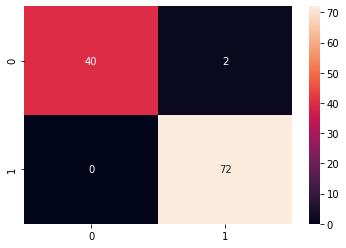

In [ ]:
cm= confusion_matrix(y_test, grid_prediction)
sns.heatmap(cm, annot= True)

In [ ]:
print(classification_report(y_test, grid_prediction))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        42
           1       0.97      1.00      0.99        72

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

